In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = 10, 10

In [14]:
with open('TSP_dataframe_0424vWP.json', 'r') as file:
    dataset_15v1 = json.load(file)
with open('TSP_dataframe_0422vT.json', 'r') as file:
    dataset_Tokyo = json.load(file)
with open('TSP_dataframe_0422vS.json', 'r') as file:
    dataset_Seoul = json.load(file)
with open('TSP_dataframe_0422vAir.json', 'r') as file:
    dataset_Airline = json.load(file)
with open('TSP_dataframe_0422vN.json', 'r') as file:
    dataset_Newyork = json.load(file)

In [15]:
dataset = {'sparsity': list(1 - np.array(dataset_15v1['density'])),
            'CV': dataset_15v1['CV'],
            'Failure ratio': np.array(dataset_15v1['const_LK'])}

"'Normalized k_max': np.array(dataset_15v1['k_max']'Normalized k_max': np.array(dataset_15v1['k_max']),\n            'average shortest path length': dataset_15v1['average_shortest_path_length'],\n            'rewiring probability': np.array(dataset_15v1['rew_prob'])"

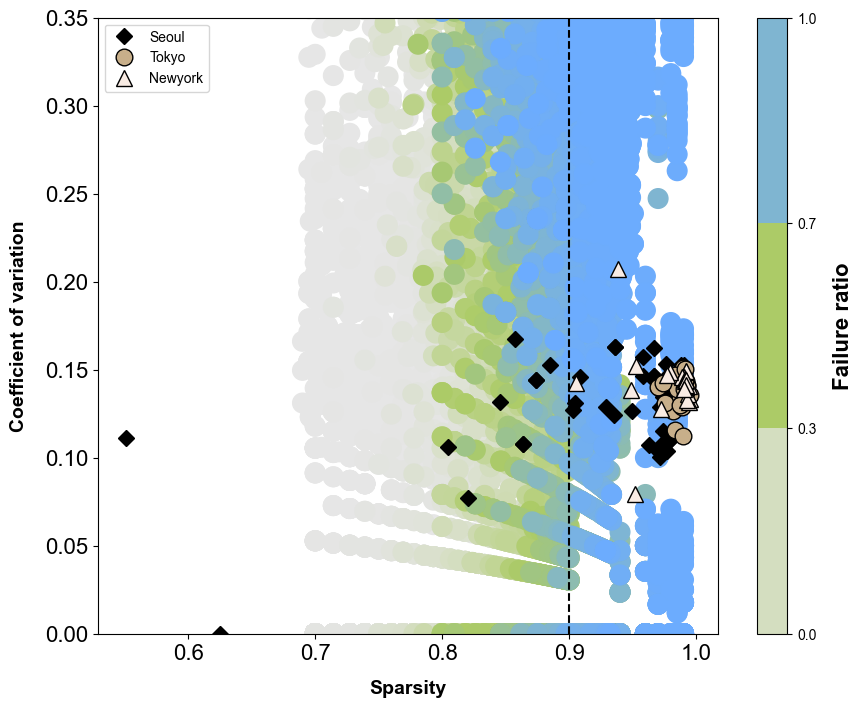

In [81]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['font.family'] = 'arial'

x_data = list(1 - np.array(dataset_15v1['density'][:-20]))
y_data = dataset_15v1['CV'][:-20]
z_data = dataset_15v1['const_LK'][:-20]
sorted_data = sorted(zip(x_data, y_data, z_data), key=lambda x: x[2])
x_sorted, y_sorted, z_sorted = zip(*sorted_data)

x_T = (list(1 - np.array(dataset_Tokyo['density'])))
y_T = (dataset_Tokyo['CV'])

x_S = (list(1 - np.array(dataset_Seoul['density'])))
y_S = (dataset_Seoul['CV'])

x_A = (list(1 - np.array(dataset_Airline['density'])))
y_A = (dataset_Airline['CV'])

x_U = (list(1 - np.array(dataset_Newyork['density'])))
y_U = (dataset_Newyork['CV'])

#colors = [(152/255, 203/255, 72/255), (0.9, 0.99, 0.99), (78/255, 152/255, 254/255)]  # 파란색에서 빨간색까지의 그라데이션
colors = [(0.9, 0.9, 0.9), (172/255, 203/255, 102/255), (108/255, 172/255, 254/255)]
cmap_name = 'custom_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)
#cm = ListedColormap(colors)

'''plt.axvspan(0, 0.9, color=[152/255, 203/255, 72/255], alpha=0.1)
plt.axvspan(0.9, 1, color=[78/255, 152/255, 254/255], alpha=0.1)'''
#plt.axvspan(0, 1, color='k', alpha=0.08)

c1 = list(np.array([226, 150, 85])/255)
c2 = list(np.array([134, 154, 86])/255)
c3 = list(np.array([146, 18, 10])/255)
plt.scatter(x_sorted, y_sorted, c=z_sorted, cmap=cm, s=200)  # c=z_data로 z 값에 따라 색상 지정
plt.plot(x_S, y_S, marker='D', label='Seoul', color='k', markeredgecolor='k', markersize=8, linestyle='None')
plt.plot(x_T, y_T, marker='o', label='Tokyo', color='#C8AF8A', markeredgecolor='k', markersize=12, linestyle='None')
plt.plot(x_U, y_U, marker='^', label='Newyork', color='#F9ECE4', markeredgecolor='k', markersize=12, linestyle='None')
#plt.plot(x_A, y_A, marker='o', label='Airline', color='red', markersize=10)

plt.axvline(x=0.9, color='k', linestyle='--')

#plt.xlim(0.7, 1.0)
plt.ylim(0, 0.35)
cbar = plt.colorbar(boundaries=[0, 0.3, 0.7, 1.0])
#cbar = plt.colorbar(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.set_label('Failure ratio', labelpad=12, fontsize=16, fontweight='bold')
plt.clim(0, 1)
plt.xlabel('Sparsity', fontsize=14, labelpad=12, fontweight='bold')
plt.ylabel('Coefficient of variation', fontsize=14, labelpad=12, fontweight='bold')
plt.tick_params(labelsize=16)
#plt.title('Failure ratio', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

In [37]:
def gradient_descent(W, x, y, dx, dy):
    # 주어진 점과 mesh 그리드 포인트 간의 거리 계산
    distances = np.sqrt((x - W[0])**2 + (y - W[1])**2)
    
    # 최소 거리를 가진 mesh 그리드 포인트의 인덱스 찾기
    nearest_index = np.argmin(distances)
    
    # 최소 거리를 가진 mesh 그리드 포인트의 x, y 좌표 및 gradient 값 찾기
    nearest_x = x.flat[nearest_index]
    nearest_y = y.flat[nearest_index]
    grad_x = dx.flat[nearest_index]
    grad_y = dy.flat[nearest_index]
    
    return np.array((nearest_x, nearest_y)), np.array((grad_x, grad_y))


In [6]:
import pandas as pd
 
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()

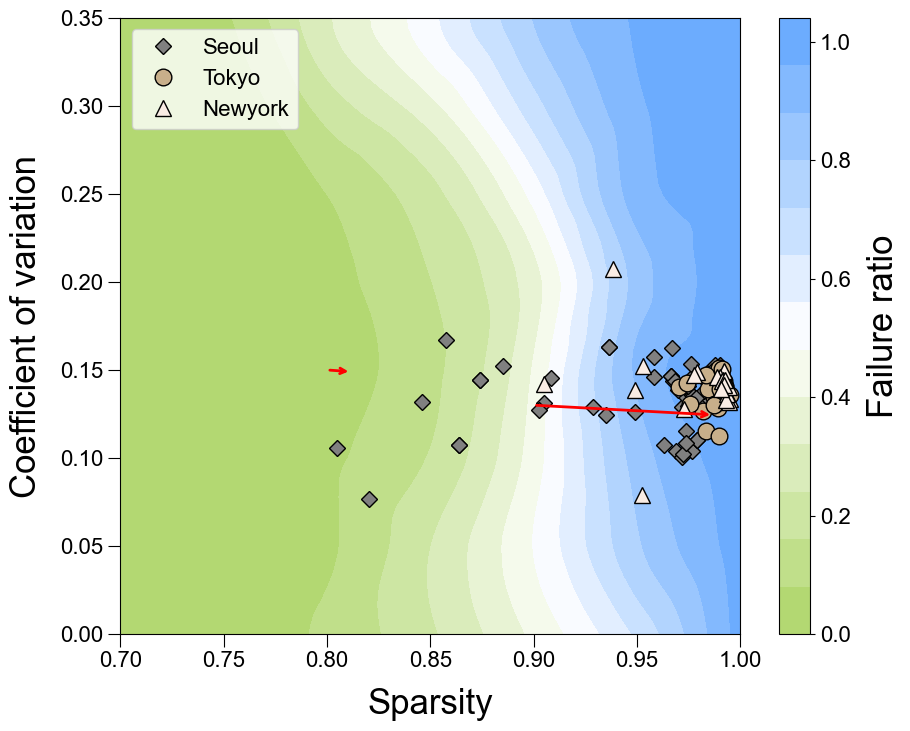

In [99]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from scipy.interpolate import griddata

plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['font.family'] = 'arial'

x_data = list(1 - np.array(dataset_15v1['density'][:-20]))
y_data = dataset_15v1['CV'][:-20]
z_data = dataset_15v1['const_LK'][:-20]

sorted_data = sorted(zip(x_data, y_data, z_data), key=lambda x: x[2])
x_sorted, y_sorted, z_sorted = zip(*sorted_data)

# 데이터를 격자(grid)에 매핑
grid_size = 0.05  # 격자의 크기 정의
rounded_x = np.round(np.array(list(x_sorted)) / grid_size) * grid_size
rounded_y = np.round(np.array(list(y_sorted)) / grid_size) * grid_size

unique_positions, indices = np.unique(np.array([rounded_x, rounded_y]), axis=1, return_inverse=True)
average_z = np.array([np.array(list(z_sorted))[indices == i].mean() for i in range(len(unique_positions[0]))])

x= unique_positions[0]
y= unique_positions[1]
z= average_z

xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')
zi[zi < 0] = 0
zi[zi > 1] = 1
zi[np.isnan(zi)] = 1

# add gradient arrow
h = 0.001
w_list = [[0.8, 0.15], [0.9, 0.13]]
for xin, yin in w_list:
    alpha = 10
    
    old_w = [(xin, yin)]
    # Perform Gradient Descent
    for i in range(1):
        xx, yy = np.meshgrid([xin, xin+h], [yin, yin+h])
        ztest = griddata((x, y), z, (xx, yy), method='cubic')
        xgrad = np.gradient(ztest[0], [xin, xin+h])
        ygrad = np.gradient(ztest[:, 0], [yin, yin+h])
        xin, yin = xin+xgrad[0]*h*alpha, yin+ygrad[0]*h*alpha
        
        old_w.append((xin, yin))
        if xin > 1 or yin > 0.35:
            break
        
    all_ws = np.array(old_w)
    
    for i in range(len(old_w) - 1):
        plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                     arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 2},
                     va='center', ha='center')

x_T = (list(1 - np.array(dataset_Tokyo['density'])))
y_T = (dataset_Tokyo['CV'])

x_S = (list(1 - np.array(dataset_Seoul['density'])))
y_S = (dataset_Seoul['CV'])

x_A = (list(1 - np.array(dataset_Airline['density'])))
y_A = (dataset_Airline['CV'])

x_U = (list(1 - np.array(dataset_Newyork['density'])))
y_U = (dataset_Newyork['CV'])

#colors = [(152/255, 203/255, 72/255), (0.9, 0.99, 0.99), ()]  # 파란색에서 빨간색까지의 그라데이션
colors = [(172/255, 213/255, 102/255), (1, 1, 1), (108/255, 172/255, 254/255)]
#colors = [(240/255, 167/255, 109/255), (1, 1, 1), (106/255, 165/255, 240/255)]
cmap_name = 'custom_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)
#cm = ListedColormap(colors)

plt.contourf(xi, yi, zi, levels=14, cmap=cm)
plt.xlim(0.7, 1.0)
plt.ylim(0, 0.35)
#cbar = plt.colorbar(boundaries=[0, 0.3, 0.7, 1.0])
cbar = plt.colorbar(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.set_label('Failure ratio', labelpad=12, fontsize=25)
cbar.ax.tick_params(labelsize=16)

#plt.scatter(x_sorted, y_sorted, c=z_sorted, cmap=cm)  # c=z_data로 z 값에 따라 색상 지정
plt.plot(x_S, y_S, marker='D', label='Seoul', color='grey', markeredgecolor='k', markersize=8, linestyle='None')
plt.plot(x_T, y_T, marker='o', label='Tokyo', color='#C8AF8A', markeredgecolor='k', markersize=12, linestyle='None')
plt.plot(x_U, y_U, marker='^', label='Newyork', color='#F9ECE4', markeredgecolor='k', markersize=12, linestyle='None')
#plt.plot(x_A, y_A, marker='o', label='Airline', color='red', markersize=10)

#plt.scatter(x, y, color='red', marker='o', label='Original Data Points')

plt.clim(0, 1)
plt.xlabel('Sparsity', fontsize=25, labelpad=12)
plt.ylabel('Coefficient of variation', fontsize=25, labelpad=12)
plt.tick_params(labelsize=16, size=9)
#plt.title('Failure ratio', fontsize=14, fontweight='bold')
plt.legend(fontsize=16, loc='upper left')
plt.show()

In [671]:
df = pd.DataFrame(dataset)

In [672]:
n_observations = len(df)
X = df.iloc[:,:-1]
y = df['Failure ratio'].values

In [673]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [674]:
Xc = sm.add_constant(X)

In [675]:
linear_regression = sm.OLS(y, Xc)

In [676]:
fitted_model = linear_regression.fit()

In [677]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     584.1
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:49:51   Log-Likelihood:                 413.67
No. Observations:                2000   AIC:                            -817.3
Df Residuals:                    1995   BIC:                            -789.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2520      0.036    -35.234      0.000      -1.322      -1.182
Normalized N            -0.1316      0.024     -5.381      0.000      -0.180      -0.084
sparsity                 1.6754      0.057     29.162      0.000       1.563       1.788
CV                       1.6036      0.083     19.350      0.000       1.441       1.766
rewiring probability    -0.0580      0.006     -9.195      0.000      -0.070      -0.046
==============================================================================
Omnibus:                       55.603   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.670
Skew:                           0.419   Prob(JB):                     1.10e-13
Kurtosis:                       2.878   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df2 = pd.DataFrame(dataset)
df_corr = df2.corr()

highlight_vals = lambda x: 'background-color: yellow' if 1>abs(x)>=0.7 else ''

df_corr.style.applymap(highlight_vals)

/tmp/ipykernel_827/2642221655.py:6: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_corr.style.applymap(highlight_vals)


,sparsity,CV,Failure ratio
sparsity,1.000000,0.089730,0.206314
CV,0.089730,1.000000,-0.047225
Failure ratio,0.206314,-0.047225,1.000000


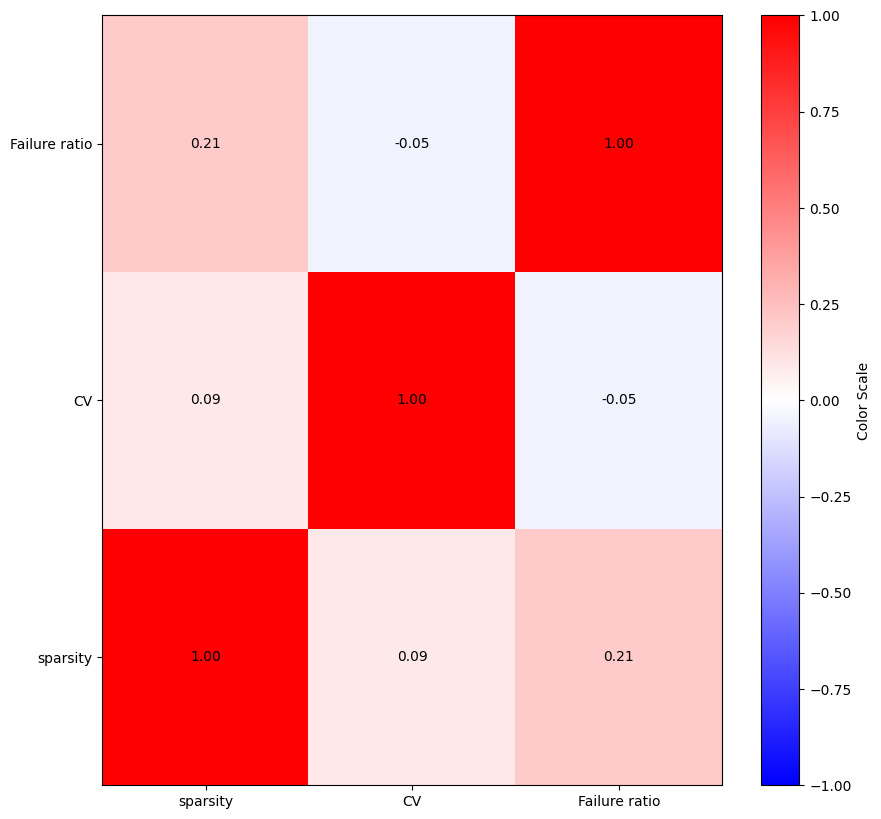

In [17]:
plt.pcolor(df_corr, cmap = 'bwr', vmin=-1, vmax=1)
ticks, labels = [x+0.5 for x in range(len(df_corr.index))], list(df_corr.index)
plt.yticks(ticks, labels)
plt.xticks(ticks, labels)

for i in range(len(df_corr.index)):
    for j in range(len(df_corr.columns)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(df_corr.iloc[i, j]), ha='center', va='center', color='black')

plt.colorbar(label='Color Scale')
plt.show()